# CS4035 - Cyber Data Analytics
## Lab 3 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name : Arpita Ravindranath
### ID : 5002702

## Student 2
### Name : Menno Bezema
### ID : 4248252

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

We added a requirements.txt file, install all the requirements using pip install -r requirements.txt

containing:
- pandas
- numpy
- matplotlib
- sklearn
- yellowbrick
- zipfile


### index (Easy navigation to sections)
This index also shows how our report is set up. We work through the questions in the assignments in order. The link to the question is the first cell in which we talk about that part (2a leads to the start of 2a).
1. [Familiarization and discretization task](#1)
    - [1a. Plot Visualizations](#1a)
    - [1b. Discretize selected features](#1b)
    - [1c. Answers and explanation](#1c)
2. [Frequent task](#2)
    - [2a. Use the SPACE SAVING Algorithm](#2a)
    - [2b. Analysis and answers to the questions](#2b)
3. [Sketching task](#3)
    - [3a. COUNT-MIN sketch](#3a)
    - [3b. Analysis and answers to the questions](#3b)
4. [Min-wise locality sensitive hashing task  task](#4)
    - [4a. Implementation](#4a)
    - [4b. Analysis and answers to the questions](#4b)
5. [Random hyperplane locality sensitive hashing task ](#5)
    - [5a. Implementation - locality sensitive hashing](#5a)
    - [5b. Analysis and answers to the questions. Also provide relevant plots](#5b)
6. [Botnet profiling task](#6)
    - [6a. Learn a sequential model.](#6a)
    - [6b. Analysis and answers to the questions.](#6b)
7. [Botnet fingerprinting task task](#7)
    - [7a. Fingerprinting.](#7a)
    - [7b. Analysis and answers to the questions.](#7b)
8. [Bonus](#8)

<a id='1'></a>

## 1. Familiarization and discretization task – 1 A4

# TODO: add titles to each plot

Familiarization and discretization task –1 A4
Consider scenario 10 from the CTU-13 data sets (see paper 4 from below resources). Remove all background flows from the data. 

	Assignment:
	1. You are to discretize the NetFlows (Apply the discretization to data from all hosts in the selected scenario). 
	2. Investigate the data from one of the infected hosts. 
	3. Select and visualize two features that you believe are most relevant for modeling the behavior of the infected host. (criteria: Shows the behavior of two features conditioned on the infection status.)
	4. Discretize these features using use any of the methods discussed in class (combine the two values into a single discrete value). (criteria: The discretization is sound, and the result investigated)
    
    Question:
	1. Do you observe any behavior in the two features that could be useful for detecting the infection? Explain and visualize. 


In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pylab as plt
import zipfile
%matplotlib inline

Find all entries that belong to the background flow by searching for the word background in the feature Label(Normal:CC:Background).When the data 'Label' feature is -1 then that flow does not belong to the background.This information will help to retrive non background flows in future.

In [38]:
# We work from a zipfile to keep memory low
archive = zipfile.ZipFile('dataset_lab3.zip', 'r')
data = pd.read_csv(archive.open('dataset_10/capture20110818.binetflow'))

# Find out which datapoints are background or not
data['Label1'] = data['Label'].str.find('Background')
#Remove all background flows
data_no_background = data[data['Label1'] == -1]

#convert the Proto,Dir,State features to numeric
label_mapping = {}
char_cols = ['Proto', 'Dir', 'State','Label']
for c in char_cols:
    data[c], label_mapping[c] = pd.factorize(data[c])
    data_no_background[c], label_mapping[c] = pd.factorize(data_no_background[c])
#label_mapping

C:\Users\maila\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [39]:
#We obtain this information from the description of the CTU13 dataset
infected_hosts = ['147.32.84.165','147.32.84.191','147.32.84.192','147.32.84.193','147.32.84.204',
                  '147.32.84.205','147.32.84.206''147.32.84.207','147.32.84.208','147.32.84.209']

normal_hosts = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36, 147.32.80.9', '147.32.87.11']

In [40]:
#getting flows related to infected host 147.32.84.165(This is the infected host chosen for visualization and discretization)
#We choose all flows where the source or destination IP is 147.32.84.165
infected1 = data_no_background[data_no_background['SrcAddr'] == infected_hosts[0]]
infected2 = data_no_background[data_no_background['DstAddr'] == infected_hosts[0]]
frames = [infected1,infected2]
infected = pd.concat(frames)
#infected

In [41]:
#getting non infected flows.This is when the source IP or destination IP belong to the list of normal hosts
normal1 = data_no_background[data_no_background['SrcAddr'].isin(normal_hosts)]
normal2 = data_no_background[data_no_background['DstAddr'].isin(normal_hosts)]
frames = [normal1,normal2]
normal = pd.concat(frames)
#normal

In [42]:
#Print variation in the features to find the ones with the most deviations
print(f"Totpackets infected mean: {np.mean(infected['TotPkts'])} - std dev: {np.std(infected['TotPkts'])}")
print(f"Totpackets normal mean:   {np.mean(normal['TotPkts'])} - std dev: {np.std(normal['TotPkts'])}")

print(f"TotBytes infected mean: {np.mean(infected['TotBytes'])} - std dev: {np.std(infected['TotBytes'])}")
print(f"TotBytes normal mean:   {np.mean(normal['TotBytes'])} - std dev: {np.std(normal['TotBytes'])}")

print(f"SrcBytes infected mean: {np.mean(infected['SrcBytes'])} - std dev: { np.std(infected['SrcBytes'])}")
print(f"SrcBytes normal mean: {np.mean(normal['SrcBytes'])}   - std dev: { np.std(normal['SrcBytes'])}")

print(f"dTos infected mean: {np.mean(infected['dTos'])} - std dev: { np.std(infected['dTos'])}")
print(f"dTos normal mean: {np.mean(normal['dTos'])}   - std dev: { np.std(normal['dTos'])}")

print(f"sTos infected mean: {np.mean(infected['sTos'])} - std dev: { np.std(infected['sTos'])}")
print(f"sTos normal mean: {np.mean(normal['sTos'])}   - std dev: { np.std(normal['sTos'])}")

print(f"Proto infected mean: {np.mean(infected['Proto'])} - std dev: { np.std(infected['Proto'])}")
print(f"Proto normal mean: {np.mean(normal['Proto'])}   - std dev: { np.std(normal['Proto'])}")

print(f"State infected mean: {np.mean(infected['State'])} - std dev: { np.std(infected['State'])}")
print(f"State normal mean: {np.mean(normal['State'])}   - std dev: { np.std(normal['State'])}")

print(f"Dur infected mean: {np.mean(infected['Dur'])} - std dev: { np.std(infected['Dur'])}")
print(f"Dur normal mean: {np.mean(normal['Dur'])}   - std dev: { np.std(normal['Dur'])}")

print(f"Dir infected mean: {np.mean(infected['Dir'])} - std dev: { np.std(infected['Dir'])}")
print(f"Dir normal mean: {np.mean(normal['Dir'])}   - std dev: { np.std(normal['Dir'])}")

# print(f"infected - mean CCDetector", np.mean(infected['CCDetector(Normal:CC:Unknown)']), np.std(infected['CCDetector(Normal:CC:Unknown)']))
# print(f"normal   - mean CCDetector", np.mean(normal['CCDetector(Normal:CC:Unknown)']), np.std(normal['CCDetector(Normal:CC:Unknown)']))

print(f"Label infected mean: {np.mean(infected['Label'])} - std dev: { np.std(infected['Label'])}")
print(f"Label normal mean: {np.mean(normal['Label'])}   - std dev: { np.std(normal['Label'])}")

Totpackets infected mean: 32.89696210460382 - std dev: 1833.7146960534678
Totpackets normal mean:   37.226810293237584 - std dev: 518.8540774153702
TotBytes infected mean: 29293.764484810523 - std dev: 1461313.154091543
TotBytes normal mean:   28335.471706895405 - std dev: 481827.8302691501
SrcBytes infected mean: 29282.68159515607 - std dev: 1461313.238340761
SrcBytes normal mean: 1723.304275550236   - std dev: 18867.270679993682
dTos infected mean: 0.0 - std dev: 0.0
dTos normal mean: 0.0   - std dev: 0.0
sTos infected mean: 0.0 - std dev: 0.0
sTos normal mean: 0.0   - std dev: 0.0
Proto infected mean: 2.990186867105126 - std dev: 0.15053843076249632
Proto normal mean: 0.7424030853115233   - std dev: 0.6900964406852172
State infected mean: 34.65340849775551 - std dev: 7.30530653151671
State normal mean: 6.370037901456214   - std dev: 12.244771119971551
Dur infected mean: 100.24288123415792 - std dev: 311.2261906676798
Dur normal mean: 39.790412464591796   - std dev: 258.6656079930237

Text(0, 0.5, 'Mean value')

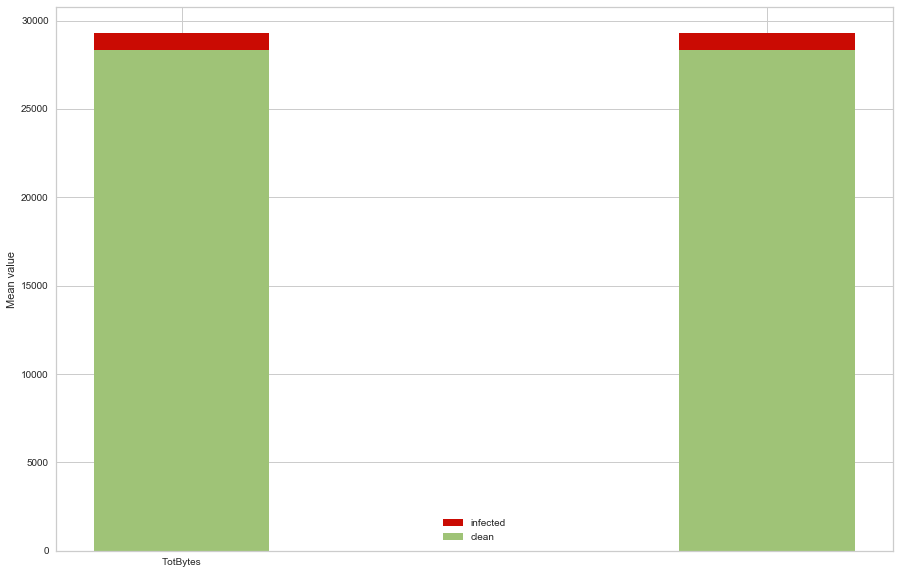

In [43]:
cols = ['TotBytes','SrcBytes','TotPkts', 'Dur','State', 'dTos','sTos', 'Proto', 'Dir','Label']

mean_infected = np.mean(infected[cols].values, axis=0)
std_infected = np.std(infected[cols].values, axis=0)

mean_clean = np.mean(normal[cols].values, axis=0)
std_clean = np.std(normal[cols].values, axis=0)


f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

ax.bar(range(2), height=mean_infected[:-9], width=0.3, color='r', label='infected')
ax.bar(range(2), height=mean_clean[:-9], width=0.3, color='g', label='clean')
ax.legend()
ax.set_xticks(range(2)) 
ax.set_xticklabels(cols[:-9], fontsize=10)
ax.set_ylabel('Mean value')

Text(0, 0.5, 'Mean value')

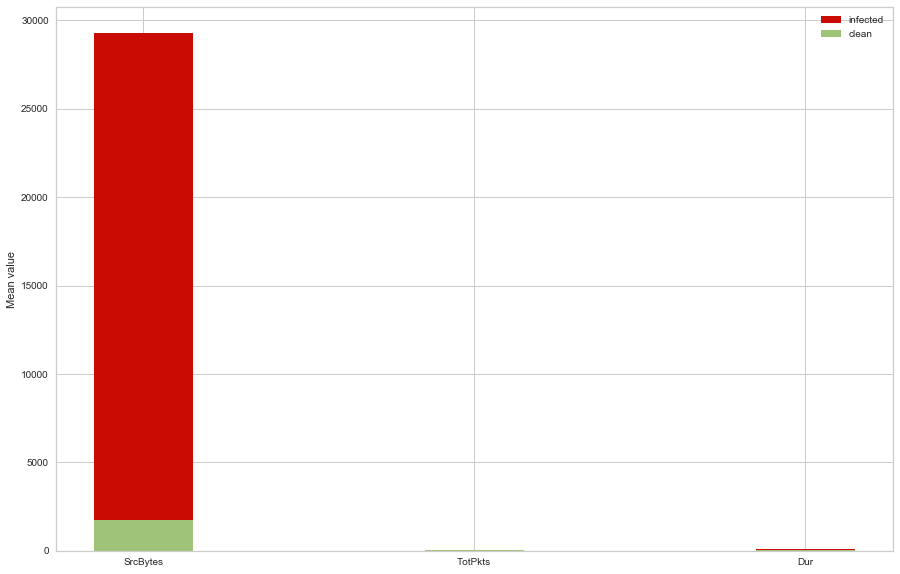

In [44]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

ax.bar(range(3),height=mean_infected[-9:-6],
          width=0.3, color='r', label='infected')
ax.bar(range(3), height=mean_clean[-9:-6], 
          width=0.3, color='g', label='clean')
ax.legend()
ax.set_xticks(range(3)) 
ax.set_xticklabels(cols[-9:-6], fontsize=10)
ax.set_ylabel('Mean value')

Text(0, 0.5, 'Mean value')

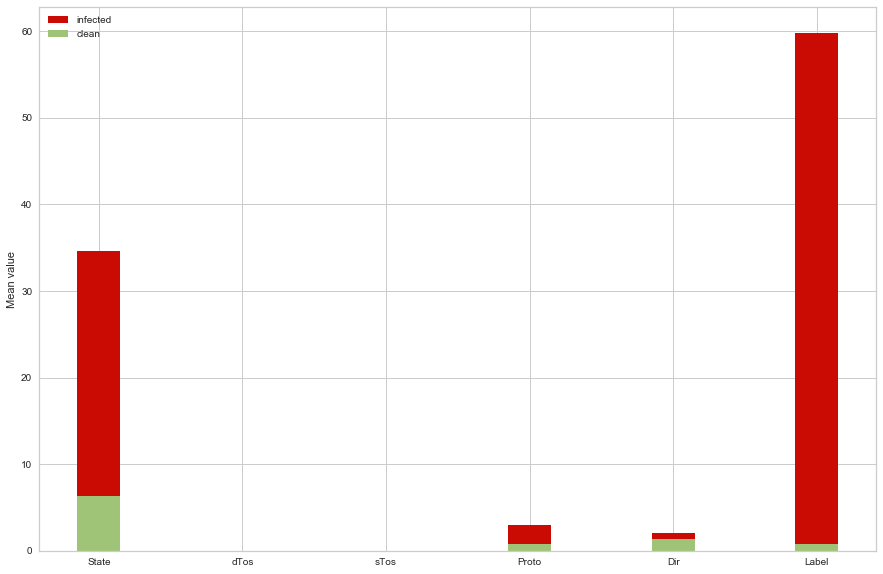

In [45]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

ax.bar(range(6),height=mean_infected[-6:],
          width=0.3, color='r', label='infected')
ax.bar(range(6), height=mean_clean[-6:], 
          width=0.3, color='g', label='clean')
ax.legend()
ax.set_xticks(range(6)) 
ax.set_xticklabels(cols[-6:], fontsize=10)
ax.set_ylabel('Mean value')

<a id='1a'></a>

### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.
    
       Select and visualize two features that you believe are most relevant for modeling the behavior of the infected host. (criteria: Shows the behavior of two features conditioned on the infection status.)

From the above plots we see that Proto,SrcBytes,TotBytes,TotPkts and State seem to be the most important features.We further choose Proto and TotPkts as they vary largely between the clean and the infected flows



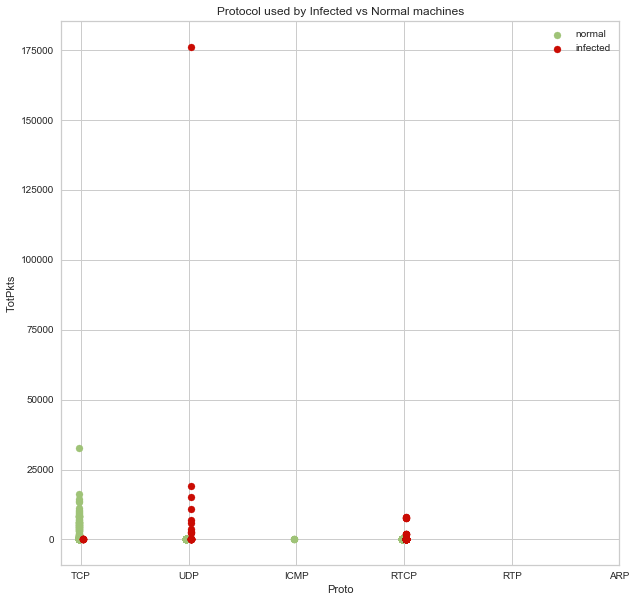

In [46]:
#Visualising these two features

plt.figure(figsize=(10,10))
plt.scatter(normal['Proto'].values-0.02, normal['TotPkts'].values, color='g', label='normal')
plt.scatter(infected['Proto'].values+0.02,infected['TotPkts'].values, color='r', label='infected')
plt.xlabel('Proto')
plt.ylabel('TotPkts')
plt.title('Protocol used by Infected vs Normal machines')
plt.xticks(range(6), ['TCP', 'UDP', 'ICMP','RTCP','RTP','ARP'])  #we get this from the mapping performed earlier
plt.legend()

<a id='1b'></a>

### 1b. Discretize selected features
    Discretize these features using use any of the methods discussed in class (combine the two values into a single discrete value). (criteria: The discretization is sound, and the result investigated)

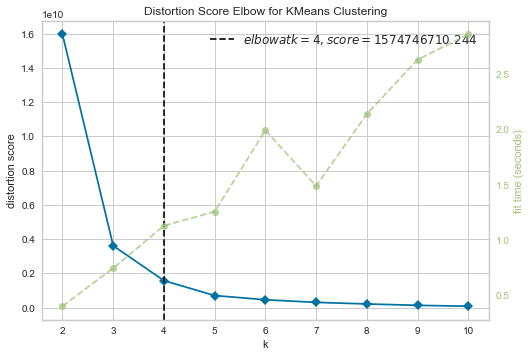

In [47]:
#Applying Elbow method to find optimal number of clusters
val = data_no_background['TotPkts'].values
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model=KElbowVisualizer(KMeans(),k=10)
model.fit(val[...,np.newaxis])
model.show()

As the breakpoint is at cluster 4.Based on this we calculate the ordinal rank

We disctretize the TotPkts feature,the Protocol feature is already discrete in nature. 
We add a new feature 'Discrete_TotPkts' which corresponds to the discretized TotPkts feature. 
Then we combine these two - Protocol and discretized TotPkts feature.
For this step we make use of the algorithm mentioned in paper 4 (Learning Behavioral Fingerprints From NetflowsUsing Timed Automata)on page 311.
We Then looked into the possible differences that could be exploited in the extracted codes.

In [48]:
def discretize(val, ranks):

    ordinal_ranks = np.linspace(0, 1, ranks, endpoint=False) #based on ranks splitting to percentiles
    ordinal_ind = np.ceil(ordinal_ranks[1:] * len(val)) #leave out 0 and calculate p/100*N and round it off,the ordinal ranks
    ordinal_val = np.array(sorted(val))[ordinal_ind.astype(int)] #select the values at the percentiles for mapping
    disc = []
    for v in val:
        for i in range(len(ordinal_val)): #i takes values 0,1,2
            if v<=ordinal_val[i]:  #check val against all the ordinal boundary values
                disc.append(i)
                break
            if i==len(ordinal_val)-1:  #if its not lesser than any boundary then it is put into the last category
                disc.append(i+1)
    return np.array(disc)  #this contains the discretized values of the feature


def extract_code(values):
    M = np.zeros(values.shape[1])
    for j in range(values.shape[1]):
        M[j] = len(np.unique(values[:,j])) #Pulls   out all rows and only jth column,M is an array consisting of no of unique value for each feature
    spacesize = np.prod(M) #its the product of the no of values for each feature
    code = np.zeros(values.shape[0], dtype=int)
    for i in range(values.shape[0]):
        s = spacesize
        for j in range(values.shape[1]):
            code[i] += values[i,j] * s/M[j]
            s = s / M[j]
    return code

To visualize the difference we make use of the normal flow data from the first normal host and compare it to the infected host data.

In [49]:
# Get Values to discretize
val = data_no_background['TotPkts'].values
TotPkts_disc = discretize(val, 3)

# add discretized values to the dataframe
data_no_background['Discrete_TotPkts'] = TotPkts_disc

feat = ['Proto', 'Discrete_TotPkts']

# Select only values associated with the infected host we want to look at
infected_data = data_no_background[np.logical_or(data_no_background['SrcAddr']==infected_hosts[0], data_no_background['DstAddr']==infected_hosts[0])]
infected_data = infected_data[feat].values # selects values of Proto and Discrete_Totpkts
infected_code = extract_code(infected_data) # Convert the Proto and Discrete_Totpkts to a new code

# Get values from a normal host to compare
clean_data = data_no_background[np.logical_or(data_no_background['SrcAddr']==normal_hosts[0], data_no_background['DstAddr']==normal_hosts[0])][feat].values
test_code= extract_code(clean_data)

C:\Users\maila\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Extracted code')

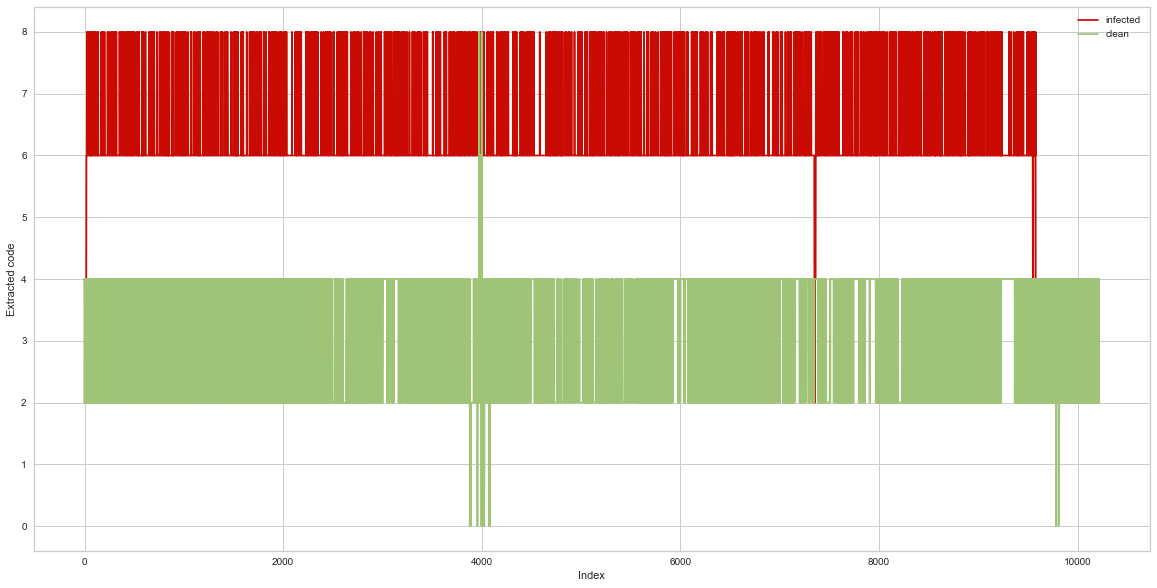

In [50]:
plt.figure(figsize=(20,10))
plt.plot(infected_code, color='r', label='infected')
plt.plot(test_code, color='g', label='clean')
plt.legend()
plt.xlabel("Index")
plt.ylabel("Extracted code")

<a id='1c'></a>

### 1b. Answers and explanation
Do you observe any behavior in the two features that could be useful for detecting the infection? Explain and visualize.

As seen in the above plots the infected data resulted in higher extracted code values, hence this could be used in classification of unseen data as infected or normal data. (This can further be used in task 5/6???)

In [11]:
#import zipfile
#archive = zipfile.ZipFile('dataset_lab3.zip', 'r')
#data = archive.read('dataset_10/capture20110818.binetflow')
# archive.namelist()

<a id='2'></a>

## 2. Frequent task – 1/2 A4 (Individual)

Use the SPACE SAVING algorithm to estimate the distribution over 3-grams of discretised symbols. 

	1. Write code for the algorithm, use it to estimate the distribution in one pass (no need to actually stream the data, you may store it in memory, or run every file separately, but do store and load the intermediate results). 
	2. Use a range of number of counters. (criteria: explanations for the number of used counters/bin)
	3. What are the 10 most frequent 3-grams and their frequencies when approximated? 
	4. Use the theory to explain any approximation errors you observe. (criteria: The 3-gram count approximation is correct, and its quality is related to theory)

<a id='2a'></a>

In [51]:
from nltk import ngrams
from collections import Counter

def n_grams(n, data):
    gram = []
    for gr in ngrams(data, n):
        gram.append(''.join(gr))
    return gram

data1 = data_no_background[feat].values
series= extract_code(data1)

# Convert from numeric to characters
values = np.unique(series)
alphabet = 'abcdefghijklmnopqrstuvw'
dict1 = {x : alphabet[i]  for i, x in enumerate(values)}
list3 = [dict1[x] for x in series]

# Convert the list of characters to n_grams based on input parameter
n_gram = n_grams(3, list3)
    
unique,counts = np.unique(n_gram,return_counts=True)

In [52]:
#merging the list and displaying the top 30 frequent ngrams and their count
def mergelist(list1,list2):
    merged_list = [(list1[i],list2[i]) for i in range(0,len(list1))]
    return merged_list

def takesec(elem):
    return elem[1]

frequencies = mergelist(counts,unique)
print(*(sorted(frequencies,reverse = True)[:30]),sep = "\n")

(78946, 'ddd')
(8020, 'ded')
(7968, 'dde')
(7962, 'edd')
(3231, 'ccc')
(2938, 'ccb')
(2819, 'bcc')
(2434, 'cbc')
(1886, 'bbb')
(884, 'ede')
(826, 'eed')
(826, 'dee')
(568, 'cbb')
(554, 'bbc')
(322, 'eee')
(244, 'bdd')
(207, 'ddb')
(193, 'dbd')
(172, 'bcb')
(123, 'bbd')
(113, 'dbb')
(94, 'bdb')
(74, 'dcc')
(68, 'ecc')
(65, 'bee')
(64, 'cbe')
(56, 'eec')
(55, 'ddc')
(54, 'cbd')
(28, 'bdc')


### 2a. Use the SPACE SAVING algorithm

    1. Write code for the algorithm, use it to estimate the distribution in one pass (no need to actually stream the data, you may store it in memory, or run every file separately, but do store and load the intermediate results). 
	2. Use a range of number of counters. (criteria: explanations for the number of used counters/bin)

In [53]:
#Space Saving algorithm implementation based on the paper http://www.cse.ust.hk/~raywong/comp5331/References/EfficientComputationOfFrequentAndTop-kElementsInDataStreams.pdf
import math, heapq

class SpaceSaving:
    def __init__(self, k):
        self.k = k
        self.n = 0
        self.counts = dict() #keeps track of k watched elements
        self.queue = []

    def inc(self, x):
        # increments the total number of elements seen
        self.n += 1

        # checks if x is being tracked,if yes the counter is incremented
        if x in self.counts:
            self.counts[x] += 1

        # x is not being watched
        else:
            # make room for x if the no of tracked elements are aldready k and x is not tracked
            if ((len(self.counts)) == self.k and self.n > self.k ):
                while True:
                    count, nval, key = self.dequeue()
                    assert self.counts[key] >= count #The value of the new elements count must be greater than equal to the counts in the tracked list
                    if self.counts[key] == count:
                        del self.counts[key] #removing element from the tracking list if its count is same as that of the new element
                        break
                    else:
                        self.enqueue(self.counts[key], nval, key) #else add the element back to the queue
            else:
                count = 0  #there is room to add x to the tracking list

            # track x
            self.counts[x] = count + 1
            self.enqueue(count, self.n, x)
        

    def enqueue(self, count, nval, key):
        heapq.heappush(
            self.queue,
            (count, nval, key)
        )

    def dequeue(self):
        return heapq.heappop(self.queue)



In [54]:
a = SpaceSaving(5)
for y in n_gram:
    a.inc(y)
    
sortedarr = sorted(a.counts.items(),key = lambda x:x[1],reverse = True)
for x in sortedarr:
    print(x)

('ddd', 80017)
('eee', 10558)
('ecc', 10541)
('ccb', 10541)
('eec', 10540)


In [56]:
a = SpaceSaving(15)
for y in n_gram:
    a.inc(y)
    
sortedarr = sorted(a.counts.items(),key = lambda x:x[1],reverse = True)
for x in sortedarr:
    print(x)

('ddd', 78947)
('ded', 8024)
('dde', 7971)
('edd', 7965)
('ccc', 3231)
('ccb', 2938)
('bcc', 2819)
('cbc', 2434)
('bbb', 1886)
('eee', 1078)
('bee', 982)
('eec', 981)
('ecc', 981)
('cbe', 981)
('ebe', 979)


In [57]:
a = SpaceSaving(20)
for y in n_gram:
    a.inc(y)

sortedarr = sorted(a.counts.items(),key = lambda x:x[1],reverse = True)
for x in sortedarr:
    print(x)

('ddd', 78946)
('ded', 8021)
('dde', 7969)
('edd', 7963)
('ccc', 3231)
('ccb', 2938)
('bcc', 2819)
('cbc', 2434)
('bbb', 1886)
('ede', 886)
('dee', 827)
('eed', 827)
('cbb', 568)
('bbc', 554)
('eee', 480)
('bee', 371)
('ecc', 370)
('cbe', 370)
('eec', 369)
('ebe', 368)


In [58]:
a = SpaceSaving(25)
for y in n_gram:
    a.inc(y)
    
sortedarr = sorted(a.counts.items(),key = lambda x:x[1],reverse = True)
for x in sortedarr:
    print(x)

('ddd', 78946)
('ded', 8020)
('dde', 7968)
('edd', 7962)
('ccc', 3231)
('ccb', 2938)
('bcc', 2819)
('cbc', 2434)
('bbb', 1886)
('ede', 885)
('dee', 826)
('eed', 826)
('cbb', 568)
('bbc', 554)
('eee', 356)
('bdd', 245)
('ddb', 213)
('dbd', 208)
('ecc', 192)
('bee', 192)
('cbe', 191)
('eec', 189)
('bcb', 186)
('beb', 181)
('ebe', 181)


In [59]:
a = SpaceSaving(30)
for y in n_gram:
    a.inc(y)
    
sortedarr = sorted(a.counts.items(),key = lambda x:x[1],reverse = True)
for x in sortedarr:
    print(x)

('ddd', 78946)
('ded', 8020)
('dde', 7968)
('edd', 7962)
('ccc', 3231)
('ccb', 2938)
('bcc', 2819)
('cbc', 2434)
('bbb', 1886)
('ede', 884)
('dee', 826)
('eed', 826)
('cbb', 568)
('bbc', 554)
('eee', 322)
('bdd', 244)
('ddb', 208)
('dbd', 193)
('bcb', 172)
('bbd', 125)
('ecc', 120)
('bee', 119)
('dbb', 118)
('cbe', 118)
('eec', 117)
('bdb', 105)
('ebe', 94)
('beb', 94)
('bec', 93)
('ecb', 93)


<a id='2b'></a>

### 2b. Analysis and answers to the questions

    3. What are the 10 most frequent 3-grams and their frequencies when approximated? 
	4. Use the theory to explain any approximation errors you observe. (criteria: The 3-gram count approximation is correct, and its quality is related to theory)


In [55]:
a = SpaceSaving(10)
for y in n_gram:
    a.inc(y)
    
sortedarr = sorted(a.counts.items(),key = lambda x:x[1],reverse = True)
for x in sortedarr:
    print(x)

('ddd', 78966)
('ded', 8131)
('dde', 8076)
('edd', 8070)
('ccc', 3670)
('eee', 3080)
('bee', 3051)
('eec', 3051)
('ecc', 3051)
('ccb', 3051)


From the above results we notice that the top 10 most frequent 3grams identified are not the exact same as that actually seen in the data.Frequent 3grams are associated with counters having bigger values,and they will not be affected by the ineffective hits of the lesser frequent elements.The infrequent 3grams will reside in the lesser value counters,these counter values grow much slower comparatively.Hence,these are more prone to errors.This is what we notice in the top 10 frequent 3grams we notice that the top5 have been identified correctly.Irrespective of data being skewed or not we see that the errors in counters is inversely proportional to the number of counters.This is due to the fact that when there are more number of counters there is a lesser chance of replacing 3grams and so there is lesser chance of overestimation and errors.This is supported by our results above.As we increase the value of the counter from 10 to 20 and 30 we notice that errors decrease.Counter-error pairs observed 5 counters - 4 errros,10 counters - 3 errors,15 counters - 5 errors ,20 counters - 5 errors,25 counters - 4 errors ,30 counters - 5 errors.

<a id='3'></a>

## 3. Sketching task – 1/2 A4 (Individual)
Build code for computing a COUNT-MIN sketch to estimate occurrence counts for the 3-grams. Make sure the hash functions are pairwise independent. 

	1. Estimate the distribution in one pass (no need to actually stream the data, you may store it in memory, or run every file separately, but do store and load the intermediate results). 
	2.	Play with different heights and widths for the COUNT-MIN sketch matrix. (criteria: explanations for the number of used counters/bin) 
	3.	What are the 10 most frequent 3-gramsand their frequencies when approximated? 
	4.	Use the theory to explain any approximation errors you observe. (criteria: The 3-gram count approximation is correct, and its quality is related to theory)


<a id='3a'></a>

In [ ]:
#%pip install --upgrade setuptools

In [ ]:
#%pip install mmh3

### 3a. COUNT-MIN sketch

    1. Estimate the distribution in one pass (no need to actually stream the data, you may store it in memory, or run every file separately, but do store and load the intermediate results). 
	2.	Play with different heights and widths for the COUNT-MIN sketch matrix. (criteria: explanations for the number of used counters/bin) 

In [60]:
#Impelmentation of count min sketch
import pandas as pd
import pickle
import numpy as np
import mmh3
import sys

def count_min_sketch(series, width, depth):
    
    n = len(series)
    
    # Initialize the sketch matrix and a depth(no of hashes)*width matrix
    sketch = np.zeros( (depth, width) )
    
    # Generating the seeds for the hash functions(depth = no of diff hash functions),the seeds are just 0 to the no of hashes-1
    seeds = list(range(depth))
    #print("seeds",seeds)
    uniqexcode = set() # Unordered collections of unique elements
   
    # Process extended code
    for x in series:
        
        # Add extended code to unique extended code set
        uniqexcode.add(x) #will not add the element if it is already present in the set
        
        # For each hash function
        for i in range(depth):
            
            # Hash extended code and increment cell in matrix
            idx = mmh3.hash(x, seeds[i]) % width
            sketch[i, idx] += 1
        

   
    # Initialize result series
    result = pd.Series(0, index=uniqexcode)
    
    # Calculate estimates
    for x in uniqexcode:
        
        min_est = n
        
        # For each hash function
        for i in range(depth):
            
            # Hash extended code and update min_count if less than already found
            idx = mmh3.hash(x, seeds[i]) % width
            val = sketch[i, idx]
            if val < min_est: 
                min_est = val
        
        result.at[x] = min_est
    
    return result.sort_values(ascending=False) #returns in descending order


<a id='3b'></a>

In [61]:
from itertools import product

widths = [5, 10, 15, 20, 50]
depths = [2, 5, 8, 10, 20, 50]

grid = list(product(widths, depths))

In [62]:
freqtable = pd.DataFrame()

for width, depth in grid:
    freqtable['%d_%d' % (width,depth)] = count_min_sketch(n_gram, width, depth)

In [63]:
with pd.option_context('display.max_columns', 100):
    with pd.option_context("display.float_format", '{:.2f}'.format):
        display(freqtable.head(10))

,5_2,5_5,5_8,5_10,5_20,5_50,10_2,10_5,10_8,10_10,10_20,10_50,15_2,15_5,15_8,15_10,15_20,15_50,20_2,20_5,20_8,20_10,20_20,20_50,50_2,50_5,50_8,50_10,50_20,50_50
bbd,84961,11605,5429,1702,1572,420,79457,298,298,180,180,139,679,679,679,163,163,126,451,158,158,158,123,123,151,123,123,123,123,123
bba,84961,1175,648,648,648,648,109,109,109,109,69,43,679,96,96,96,68,14,69,4,4,4,3,3,6,3,3,3,3,3
deb,84961,9516,648,648,92,92,5504,1478,245,245,47,47,679,679,36,36,20,20,60,35,35,35,20,20,199,20,20,17,17,17
eec,84961,3160,648,648,648,436,109,109,109,109,109,109,823,823,132,57,57,57,69,58,58,58,57,57,58,56,56,56,56,56
dec,84961,1175,1175,1175,982,190,109,45,45,45,45,6,11,11,11,11,11,11,69,43,43,43,22,6,34,11,6,6,6,6
aac,84961,2585,648,648,648,436,109,109,109,109,69,62,679,95,36,36,36,13,60,60,18,18,2,1,49,3,3,3,1,1
ddd,84961,79307,79307,79307,79307,79122,79457,79009,79009,79009,79009,78961,79906,79118,78950,78950,78950,78947,79006,78981,78979,78948,78948,78948,79071,78946,78946,78946,78946,78946
bdc,84961,3160,2529,1702,1572,694,5504,2806,738,180,69,36,679,59,59,59,32,32,5444,28,28,28,28,28,93,28,28,28,28,28
dcc,22410,4442,4442,4442,1153,694,5504,948,948,948,109,95,679,96,96,91,91,84,210,210,92,92,74,74,81,77,76,74,74,74
ebe,22410,12753,1155,1155,1153,711,5504,298,298,298,151,31,1927,130,36,36,36,16,269,165,165,160,26,13,814,12,12,12,12,12


### 3b. Analysis and answers to the questions

    3.	What are the 10 most frequent 3-grams and their frequencies when approximated? 
	4.	Use the theory to explain any approximation errors you observe. (criteria: The 3-gram count approximation is correct, and its quality is related to theory)


In [64]:
#Based on sketch accuracy(page 4) in the paper http://dimacs.rutgers.edu/~graham/pubs/papers/cmsoft.pdf
error     = .01  # Error of at most 0.01
certainty = .999 # with 99.9% certainty
optimal = pd.DataFrame()
w = math.ceil(2 / error)
d = math.ceil(np.log(1 - certainty) / np.log(1/2))
optimal['cm_%d_%d' % (w,d)] = count_min_sketch(n_gram, w, d)
print("w,d",w,d)

w,d 200 10


In [65]:
with pd.option_context('display.max_columns', 1000):
    display(optimal.head(10))

,cm_200_10
ddd,78946
ded,8020
dde,7968
edd,7962
ccc,3231
ccb,2938
bcc,2819
cbc,2434
bbb,1886
ede,884


The above table is the 10 most frequent 3grams based on the count min-sketch algorithm.Since the value for the width and depth were optimized we notice that these 10 3grams coincide with the actual 10 most frequent 3grams in the dataset.When the value of w is very small there will be more no of hash collisions.As mentioned in the paper this translates into a expected fraction of weight colliding with i being at most N/w. In some cases, the colliding weight will be less than this; in other cases  the colliding weight will be more.Tthe hash functions  per row are different each time, they give a different mapping of an item to counters, and so a different collection of items collide with i in each row.So we need a good approximation of both values to ensure minimal collisions and minimal colliding weights. “Suppose we want an error of at most 0.1% (of the sum of all frequencies), with 99.9% certainty. Then we want 2/w = 1/1000, we set w = 2000, and 1 2 d = 0.001, i.e. d = log 0.001/ log 0.5 ≤ 10.” - (page 4) in the paper http://dimacs.rutgers.edu/~graham/pubs/papers/cmsoft.pdf

<a id='4'></a>

## 4. Min-wise locality sensitive hashing task – 1/2 A4 (Individual)

Implement min-wise locality sensitive hashing as explained in the slides and the documents on Brightspace. This can be used to quickly compute the Jaccard distance for N-gram profiles. 

	1.	Use the discretization from task 1, build 3-gram profiles for every individual connection (pair of IP-addresses). 
	2.	For this task, the profiles are binary, an N-gram (subsequence) exists (a 1 in the table) or does not (a 0 in the table). 
	3.	Use min-wise LSH to map the 3-gram profiles to a small set of bins of your choice. (Criteria: The number of bins is set sensibly)
	4.	Compare the run-time of a pair-wise distance computation with one that only considers profiles that end in the same bin. 
	5.	Explain any differences you observe. (criteria: The resulting comparison explains differences in run-time and quality.)

<a id='4a'></a>

### 4a. Implementation
    1.	Use the discretization from task 1, build 3-gram profiles for every individual connection (pair of IP-addresses). 
	2.	For this task, the profiles are binary, an N-gram (subsequence) exists (a 1 in the table) or does not (a 0 in the table). 
	3.	Use min-wise LSH to map the 3-gram profiles to a small set of bins of your choice. (Criteria: The number of bins is set sensibly)

In [69]:
# Get Values to discretize
val = data_no_background['TotPkts'].values
TotPkts_disc = discretize(val, 3)

# add discretized values to the dataframe
data_no_background['Discrete_TotPkts'] = TotPkts_disc
feat = ['Proto', 'Discrete_TotPkts']

# Select only values associated with the infected host we want to look at
infected_data = data_no_background[np.logical_or(data_no_background['SrcAddr']==infected_hosts[0], data_no_background['DstAddr']==infected_hosts[0])]
infected_data = infected_data[feat].values # selects values of Proto and Discrete_Totpkts
infected_code = extract_code(infected_data) # Convert the Proto and Discrete_Totpkts to a new code

# Get values from a normal host to compare
clean_data = data_no_background[np.logical_or(data_no_background['SrcAddr']==normal_hosts[0], data_no_background['DstAddr']==normal_hosts[0])][feat].values
test_code= extract_code(clean_data)

C:\tools\Anaconda3\envs\Cyber Data analytics\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


AttributeError: 'DataFrame' object has no attribute 'count_values'

In [143]:
# Generate all possible IP-pairs
ip_pairs = set()
for index, row in data_no_background.iterrows():
    pair = (row['SrcAddr'], row['DstAddr'])
    if not (row['DstAddr'], row['SrcAddr']) in ip_pairs:
        if not pair in ip_pairs:
            ip_pairs.add(pair)
print(f'amount of pairs: {len(ip_pairs)}')

557


We want to reach the following matrix:

3-gram     ip_pair1     ip_pair2
000        0            1
001        1            1
011        0            0

In [182]:
from nltk import ngrams

def n_grams_set(n, data):
    return set([gr for gr in ngrams(data, n)])

# Convert to function for multiple scenarios?

# Find out all possible code values
total_data = data_no_background[['Proto', 'Discrete_TotPkts']].values # selects values of Proto and Discrete_Totpkts
total_codes = extract_code(total_data)
possible_vals = np.unique(total_codes)

# first create a dataframe containing all possible indices:
indices = set()
max_val = max(possible_vals) + 1
for one in range(0, max_val):
    for two in range(0, max_val):
        for three in range(0, max_val):
            indices.add((one, two, three))
result_df = pd.DataFrame(columns=sorted(list(indices)))

# For every pair: discretize the value
for pair in ip_pairs:
    
    # Get all data associated with the pair
    pair_data = data_no_background[
        np.logical_or(
            np.logical_or(data_no_background['SrcAddr']==pair[0], data_no_background['DstAddr']==pair[1]),
            np.logical_or(data_no_background['SrcAddr']==pair[1], data_no_background['DstAddr']==pair[0]))]
    pair_data = pair_data[['Proto', 'Discrete_TotPkts']].values # selects values of Proto and Discrete_Totpkts
    pair_code = extract_code(pair_data) # Convert the Proto and Discrete_Totpkts to a new code    
    
    # We now have [4 4 2 ... 6 6 6] for this pair, we want to get the unique n_grams
    pair_set = n_grams_set(3, pair_code)
    
    # We add a row to the resulting dataframe with the title of the pair
    result_df = result_df.append(pd.Series(name=pair))
    
    # For every 3-gram present in the pair we add a 1
    for val in pair_set:
        result_df.loc[pair, val] = 1
        
# Drop all non used tri-gram pairs and fill the na with 0
result_df.dropna(how='all', axis=1, inplace=True)
result_df.fillna(0, inplace = True)
result_df = result_df.transpose()
result_df.head()

C:\tools\Anaconda3\envs\Cyber Data analytics\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


('147.32.1.20', '147.32.85.20')
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
('147.32.1.20', '147.32.86.176')
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
('147.32.1.20', '147.32.85.8')
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
('147.32.1.20', '147.32.86.155')
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
('147.32.1.20', '147.32.86.168')
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
('147.32.1.20', '147.32.85.7')
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


,"(147.32.84.165, 147.32.96.69)","(147.32.84.164, 90.183.112.34)","(147.32.84.164, 209.85.149.189)","(147.32.84.170, 63.245.209.93)","(147.32.80.9, 147.32.86.134)","(147.32.84.208, 65.55.56.40)","(147.32.84.205, 65.55.56.40)","(147.32.84.170, 209.85.148.105)","(147.32.84.134, 209.85.148.96)","(147.32.84.206, 74.125.232.201)",...,"(147.32.84.134, 209.85.148.99)","(147.32.84.170, 80.82.157.71)","(147.32.84.134, 80.239.149.11)","(147.32.84.208, 147.32.80.9)","(147.32.84.164, 147.32.96.69)","(147.32.84.170, 209.85.149.102)","(147.32.84.164, 74.125.232.221)","(147.32.84.164, 74.125.232.210)","(147.32.84.192, 147.32.80.9)","(147.32.80.9, 147.32.84.2)"
"(0, 0, 0)",0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
"(0, 0, 2)",0,0,0,1,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
"(0, 0, 4)",0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
"(0, 2, 2)",0,0,0,1,0,0,0,1,1,0,...,1,1,1,0,0,1,0,0,0,0
"(0, 2, 4)",0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [222]:
import random
import time

def universal_hashing():
    # Source: https://github.com/4d55397500/learning-scraps/blob/master/minhash/minhash.py
    def rand_prime():
        while True:
            p = random.randrange(2 ** 32, 2 ** 34, 2)
            if all(p % n != 0 for n in range(3, int((p ** 0.5) + 1), 2)):
                return p
    m = 2 ** 32 - 1
    p = rand_prime()
    a = random.randint(0, p)
    if a % 2 == 0:
        a += 1
    b = random.randint(0, p)
    def h(x):
        return ((a * x + b) % p) % m
    return h

def minhash(dataframe, N_HASHES=10):
    df_to_hash = dataframe.copy()
    
    # Generate a list of hash functions
    hash_funcs = []
    for i in range(N_HASHES):
        hash_funcs.append(universal_hashing())
    print([h(0) for h in hash_funcs])
    return
    df_hashed = pd.DataFrame(index=range(0,N_HASHES), columns=df_to_hash.columns)
    # df hashed:
    #     ip_pair1   ip_pair2
    # h1
    # h2
    # h3
    df_hashed = df_hashed.fillna(100000000000)
    
    # We need a new index so we start from 1 again
    df_to_hash.index = np.arange(1, len(test) + 1)
    
    for index_to_hash, tri_gram_row in df_to_hash.iterrows():
        for ip_pair in df_to_hash.columns:
#             print(tri_gram_row)
            if tri_gram_row[ip_pair] == 1:
                # If the tri_gram[ip_pair] value == 1 we calculate all hash functions using index_to_hash and get the minimum
                # tri_gram[ip_pair] value == 1
                for index_hashed, hash_row in df_hashed.iterrows():
                    # For all hash functions calculate the new value using the index_to_hash
                    new_val = hash_funcs[index_hashed](index_to_hash)
                    old_val = hash_row[ip_pair]
#                     print(f'index_hashed: {index_hashed}, ip_pair: {ip_pair}')
#                     print(f'new_val: {new_val}, old_val: {old_val}')
                    
                    df_hashed.at[index_hashed, ip_pair] = min(old_val, new_val)
        if index_to_hash % 50 == 0:
            print(time.time() - start)            
    return df_hashed
start = time.time()
minhashed_df = minhash(result_df, N_HASHES=100)
print(time.time() - start)
minhashed_df

[3821414792, 2123031063, 3709210156, 2711576546, 2699861516, 3839701711, 1964726520, 3477901741, 41127606, 2781008980, 3333822496, 2931935677, 1710760875, 2576183944, 3333685452, 941017254, 1418836495, 8738285, 2236131300, 2527806351, 1669026371, 1741235415, 2209824094, 1144335434, 1046672678, 1306732715, 2220514239, 3554489332, 2977578178, 2379738569, 3939685625, 2158764161, 1535533607, 3041845050, 2880801758, 1823120049, 1457145809, 3084689613, 3560451671, 2532528726, 2541187973, 3384732939, 3511861689, 4072109702, 2816925751, 3161781565, 963520376, 3622247320, 10997528, 60819886, 2828001093, 3925314963, 3749002991, 2200864892, 3678391611, 710497766, 3338669721, 2676896367, 1527518444, 3864880889, 1216438996, 646413522, 986589753, 1989413392, 932166244, 199278646, 330658048, 2239283590, 2737485560, 1630448931, 525678154, 1589565164, 130635396, 3697881070, 3547576998, 1646441064, 907206954, 2806048444, 1534401076, 2658447159, 605178577, 2736775176, 2187419875, 2213704623, 1434049814, 

,0,1,2,3,4,5,6,7,8,9


In [ ]:
def jaccard_similarity(pair_1, pair_2)
    d1 = set(pair_1)
    d2 = set(pair_2)
    jacc_sim = len(d1.intersection(d2)) / len(d1.union(d2))
    print("jaccard similarity: {}".format(jacc_sim))

    

#     m1 = [min([h(e) for e in d1]) for h in hash_funcs]
#     m2 = [min([h(e) for e in d2]) for h in hash_funcs]
    
#     minhash_sim = sum([int(m1[i] == m2[i]) for i in range(N_HASHES)]) / N_HASHES
#     print("min-hash similarity: {}".format(minhash_sim))

Steps to execute are:

	1.	Combine feature from 2 discretized features.
	2.	Think of an alphabet for which to make your grams
	3.	using that alphabet, per IP-pair make 3 grams of the whole connection
	4.	maintain a list/dict per IP-pair containing absence or presence of 3-gram
	5.  Use min-wise LSH to map the 3-gram profiles to a small set of bins of your choice. (Criteria: The number of bins is set sensibly)
	6.  Compare the run-time of a pair-wise distance computation with one that only considers profiles that end in the same bin. 
	7.  Explain any differences you observe. (criteria: The resulting comparison explains differences in run-time and quality.)

<a id='4b'></a>

### 4b. Analysis and answers to the questions
    
    4.	Compare the run-time of a pair-wise distance computation with one that only considers profiles that end in the same bin. 
	5.	Explain any differences you observe. (criteria: The resulting comparison explains differences in run-time and quality.)

<a id='5'></a>

## 5. Random hyperplane locality sensitive hashing task – 1/2 A4 (Individual)

Implement locality sensitive hashing using random hyperplanes as explained in the slides and the documents on Brightspace. This can be used to quickly compute Euclidean distance for N-gram profiles.

	1.	Use the discretization from task 1, build 3-gram profiles for every individual connection (pair of IP-addresses). 
	2.	For this task, the profiles are countsfor every possible 3-gram (subsequence).
	3.	Use random hyperplanes LSH to map the N-gram profiles to a small set of bins of your choice. 
	4.	Compare the run-time of a pair-wise distance computation with one that only considers profiles that end in the same bin. (criteria: The number of bins is set sensibly)
	5.	Explain any differences you observe. (criteria: The resulting comparison explains differences in run-time and quality.)


<a id='5a'></a>

### 5a. Implementation - locality sensitive hashing

    1.	Use the discretization from task 1, build 3-gram profilesfor every individual connection (pair of IP-addresses). 
	2.	For this task, the profiles are countsfor every possible 3-gram (subsequence).
	3.	Use random hyperplanes LSH to map the N-gram profiles to a small set of bins of your choice. 

<a id='5b'></a>

### 5b. Analysis and answers to the questions. Also provide relevant plots.

    4.	Compare the run-time of a pair-wise distance computation with one that only considers profiles that end in the same bin. (criteria: The number of bins is set sensibly)
	5.	Explain any differences you observe. (criteria: The resulting comparison explains differences in run-time and quality.)

<a id='6'></a>

## 6.Botnet profiling task – 1/2 A4

    1.	Use a sliding window to obtain sequence data for every host in all scenarios considered in paper 4 (with multiple infected hosts), with a length of your choice. (criteria: Advanced sequential model learning is used correctly, one for each host.)
	2.	Learn an n-gram model from the data of one infected host and match its profile (e.g., n-grams using cosine distance, or probabilities using KL-divergence) with all other hosts from the same scenario. 
	3.	Evaluate how many new infections your method finds and false positives it raises (as in paper 4) (criteria: Profile matching and evaluation are correct)


<a id='6a'></a>

### 6a. Learn a sequential model

    1.	Use a sliding window to obtain sequence data for every host in all scenarios considered in paper 4 (with multiple infected hosts), with a length of your choice. (criteria: Advanced sequential model learning is used correctly, one for each host.)
	2.	Learn an n-gram model from the data of one infected host and match its profile (e.g., n-grams using cosine distance, or probabilities using KL-divergence) with all other hosts from the same scenario. 

<a id='6b'></a>

### 6b. Analysis and answers to the questions.

    3.	Evaluate how many new infections your method finds and false positives it raises (as in paper 4) (criteria: Profile matching and evaluation are correct)


<a id='7'></a>

## 7.Botnet fingerprinting task – 1/2 A4

    1.	Use the obtained botnet profiles for fingerprinting, i.e., look for the occurrence of an n-gram that does not occur in any benign traffic. 
	2.	Whenever this subsequence occurs, you raise an alarm. 
	3.	Evaluate how many new infections your method finds and false positives it raises (as in paper 4).
	4.	Compare it to profiling and explain the results. (criteria:Fingerprinting is correctly applied. Comparison to profiling is sound and considers both run-time and the kinds of behaviors that can be detected)

<a id='7a'></a>

### 7a. Fingerprinting

    1.	Use the obtained botnet profiles for fingerprinting, i.e., look for the occurrence of an n-gram that does not occur in any benign traffic. 
	2.	Whenever this subsequence occurs, you raise an alarm. 


<a id='7b'></a>

### 7b. Analysis and answers to the questions.
	3.	Evaluate how many new infections your method finds and false positives it raises (as in paper 4).
	4.	Compare it to profiling and explain the results. (criteria:Fingerprinting is correctly applied. Comparison to profiling is sound and considers both run-time and the kinds of behaviors that can be detected)

<a id='8'></a>

## 8. Bonus Task 1/2 A4

### 8a. Provide implementation and analysis.